In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Project folder in Drive
project_dir = "/content/drive/MyDrive/Heart_Disease_Project"

# Go to notebooks folder
os.chdir(os.path.join(project_dir, "notebooks"))
os.listdir()  # Check current files

['01_data_preprocessing.ipynb']

In [ ]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv(os.path.join(project_dir, "data", "heart_disease_cleaned.csv"))
print("✅ Cleaned data loaded successfully!")
df.head()

✅ Cleaned data loaded successfully!


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,0.936181,1.0,0.750380,-0.276443,1.0,0.017494,0.0,1.068965,0.0,0,0,0,0,0,1,0,1,1,0
1,1.378929,1.0,1.596266,0.744555,0.0,-1.816334,1.0,0.381773,3.0,1,0,0,1,0,1,1,0,0,0
2,1.378929,1.0,-0.659431,-0.353500,0.0,-0.899420,1.0,1.326662,2.0,1,0,0,1,0,1,1,0,0,1
3,-1.941680,1.0,-0.095506,0.051047,0.0,1.633010,0.0,2.099753,0.0,0,0,1,0,0,0,0,1,0,0
4,-1.498933,0.0,-0.095506,-0.835103,0.0,0.978071,0.0,0.295874,0.0,0,1,0,0,0,1,0,0,0,0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
X = df.drop("target", axis=1)
y = df["target"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [ ]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

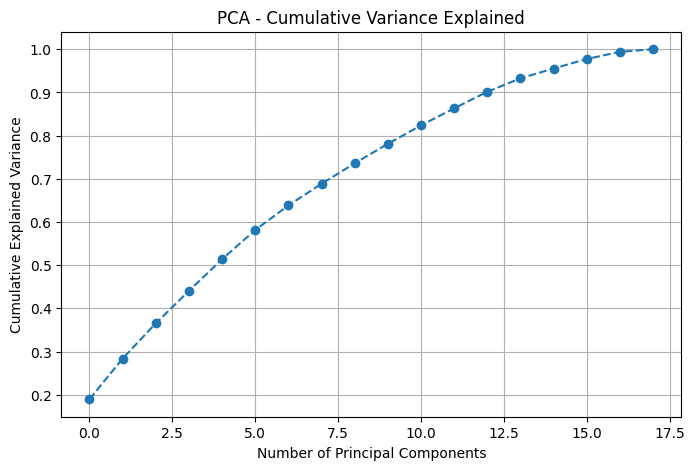

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Variance Explained")
plt.grid(True)
plt.show()

In [ ]:
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"✅ Number of components to retain 95% variance: {n_components_95}")

✅ Number of components to retain 95% variance: 15


In [ ]:
pca_opt = PCA(n_components=n_components_95)
X_pca_opt = pca_opt.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca_opt, columns=[f"PC{i+1}" for i in range(n_components_95)])
df_pca["target"] = y.values


In [ ]:
pca_output_path = os.path.join(project_dir, "data", "heart_disease_pca.csv")
df_pca.to_csv(pca_output_path, index=False)
print(f"✅ PCA-transformed dataset saved to: {pca_output_path}")


✅ PCA-transformed dataset saved to: /content/drive/MyDrive/Heart_Disease_Project/data/heart_disease_pca.csv


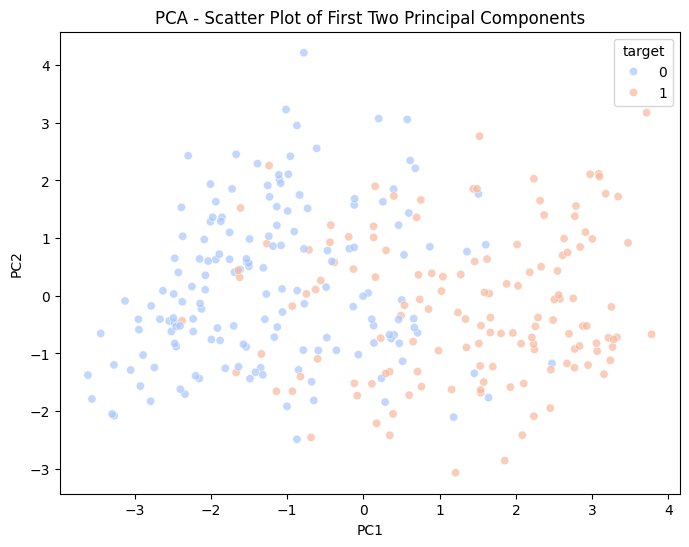

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue="target", data=df_pca, palette="coolwarm", alpha=0.7)
plt.title("PCA - Scatter Plot of First Two Principal Components")
plt.show()

In [ ]:
!mv "/content/drive/MyDrive/Colab Notebooks/02_pca_analysis.ipynb" "/content/drive/MyDrive/Heart_Disease_Project/notebooks/02_pca_analysis.ipynb"
